In [1]:
from GA import solve_with_constraints
from TSP import compute_distance_matrix

# Tọa độ các thành phố (ví dụ)
locations = [
    (21.028511, 105.804817),  # Hà Nội
    (16.047079, 108.206230),  # Đà Nẵng
    (10.762622, 106.660172),  # TP.HCM
    (11.565670, 104.921070),  # Phnom Penh
]

# Tính ma trận khoảng cách
distances = compute_distance_matrix(locations)

# Time windows cho từng thành phố (giờ mở - đóng cửa)
time_windows = [
    (8, 18),  # Hà Nội
    (8, 12),  # Đà Nẵng đóng cửa sớm
    (8, 18),  # TP.HCM
    (8, 18),  # Phnom Penh
]

# Gọi thuật toán GA với ràng buộc time window
distance, route, fitness_history = solve_with_constraints(
    problem=distances,
    population_size=100,
    generations=200,
    mutation_rate=0.05,
    mutation_algorithm='inversion',
    crossover_algorithm='two_point',
    selection_algorithm='tournament',
    time_windows=time_windows,
    speed=60
)

print("Khoảng cách tối ưu (có penalty nếu vi phạm):", distance)
print("Lộ trình tối ưu (index 0-based):", route)


Khoảng cách tối ưu (có penalty nếu vi phạm): 34077.45499957343
Lộ trình tối ưu (index 0-based): [1, 2, 3, 4, 1]


Khoảng cách tối ưu có ràng buộc Time Window: 192205.60542329165
Lộ trình tối ưu (theo chỉ số điểm bắt đầu từ 1): [1, 11, 10, 12, 5, 3, 2, 6, 16, 7, 15, 17, 21, 18, 19, 23, 22, 24, 20, 9, 4, 8, 25, 14, 13, 1]


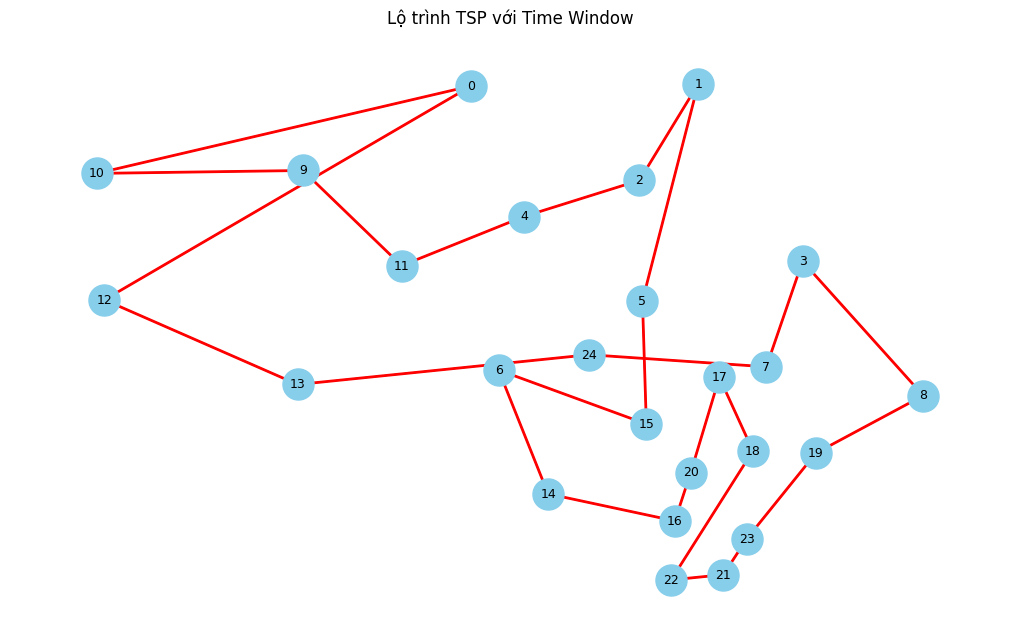

In [9]:
import pandas as pd
from TSP import compute_distance_matrix, visualize
from GA import solve_with_constraints

def load_time_windows(n):
    """
    Ví dụ: Tạo các time window ngẫu nhiên hoặc cố định cho mỗi điểm.
    Đây là hàm bạn có thể tùy chỉnh.
    """
    # Ví dụ time windows (start, end) tính theo đơn vị giờ, điểm 0 là start điểm có time window rộng
    time_windows = [(0, 10)]  # Điểm xuất phát
    for i in range(1, n):
        start = i  # giả định bắt đầu từ giờ i
        end = start + 5  # mỗi điểm có cửa sổ 5 giờ
        time_windows.append((start, end))
    return time_windows

def main():
    # 1. Đọc dữ liệu tọa độ từ file CSV
    df = pd.read_csv('../data/6_NorthRegion.csv')  # đường dẫn tới file csv của bạn
    locations = list(zip(df['lat'], df['lon']))

    # 2. Tính ma trận khoảng cách
    distance_matrix = compute_distance_matrix(locations)

    # 3. Tạo time windows cho mỗi điểm
    time_windows = load_time_windows(len(locations))

    # 4. Gọi giải thuật GA có ràng buộc time window
    distance, route, fitness_history = solve_with_constraints(
        problem=distance_matrix,
        population_size=100,
        generations=200,
        mutation_rate=0.01,
        mutation_algorithm='swap',
        crossover_algorithm='single_point',
        selection_algorithm='tournament',
        time_windows=time_windows,
        speed=60  # tốc độ di chuyển giả định km/h
    )

    print("Khoảng cách tối ưu có ràng buộc Time Window:", distance)
    print("Lộ trình tối ưu (theo chỉ số điểm bắt đầu từ 1):", route)

    # 5. Hiển thị lộ trình tối ưu trên bản đồ
    # Lưu ý route là danh sách điểm 1-based trong GA.py, cần trừ 1 khi lấy tọa độ
    zero_based_route = [r - 1 for r in route]
    visualize(locations, zero_based_route, title="Lộ trình TSP với Time Window")

if __name__ == "__main__":
    main()
